# Concrete Compressive Strength

<img src="https://universaltesthouse.in/assets/images/services/compressive.jpg">

 Beton, inşaat mühendisliğinin en önemli malzemesidir. Beton basınç dayanımı, yaş ve bileşenlerin oldukça doğrusal olmayan bir fonksiyonudur. Bu bileşenler çimento, yüksek fırın cürufu, uçucu kül, su, süperakışkanlaştırıcı, kaba agrega ve ince agregayı içerir.

<b>Problem 1:</b> Regression<p>
Develop a machine learning model that can predict the Concrete Compressive Strength for a particular concrete recipe given the quantities for input ingredients and a number of days (Age) for curing the concrete.

This is a baseline model.  What we are primarily interested in here is:

1. Making sure that the data is properly formatted for scikit-learn.
2. Identifying and separating features (X) and target (y).
3. Having a base score for the model that we can use to measure progress.
4. Validating that we have enough data for both training and testing.
5. Use at least 7 conventional machine learning algorithms and DEEP LEARNING (Tensorflow - Keras or Pytorch) to predict Concrete Compressive Strengthkullanmak .

<b>Problem 2:</b> Classification

Develop a machine learning model that can predict the ConcreteClass for a particular concrete recipe.

Take concrete regression data and modify it to be suitable for  classification examples.# create new categorical targetsts
Create new columns using the followingwfunctions

Develop a machine learning model that can predict the ConcreteClass

for a particular concrete recipe given the quantities for input ingredients and a number of days (Age) for curing the concrete.

This is a baseline model.  What we are primarily interested in here is:

1. Making sure that the data is properly formatted for scikit-learn.
2. Identifying and separating features (X) and target (y).
3. Having a base score for the model that we can use to measure progress.
4. Validating that we have enough data for both training and testing.
5. Use at least 7 conventional machine learning algorithms and DEEP LEARNING
(Tensorflow - Keras or Pytorch)  to predict ConcreteClass

y=𝛽0+𝛽1𝑥1+𝛽2𝑥2+𝛽3𝑥3+𝛽4𝑥4+𝛽5𝑥5+𝛽6𝑥6+𝛽7𝑥7+𝛽8𝑥8<p>
x1 Betondur  - x2 Cüruftur  - x3 Uçucu Küldür  - x4 Sudur  - x5 Plastikleştiricidir - x6 KabaAğ'dır  - x7 İnceAğ'dır  - x8 Yaştır  ve tüm 𝛽 değerleri doğrusal regresyonla belirlenir.

Veri Özellikleri: Belirli bir yaş (gün) altında belirli bir karışım için gerçek beton basınç dayanımı (MPa) laboratuvardan belirlenmiştir. Veriler ham haldedir (ölçeklendirilmemiştir).

Özet İstatistikler:

Örnek sayısı (gözlemler): 1030 Öznitelik sayısı: 9 Öznitelik dağılımı: 8 nicel girdi değişkeni ve 1 nicel çıktı değişkeni Eksik Öznitelik Değerleri: Hiçbiri

<a href="https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength">Dataya buradan Erişebilirsiniz</a>

In [1]:
#pip install tensorflow

In [2]:
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Ridge, Lasso, ElasticNet
import numpy as np

import tensorflow as tf

from sklearn.preprocessing import normalize, scale
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_excel("Concrete_Data.xls")

In [4]:
df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [5]:
df.columns = ['Cement', 'Slag', 'FlyAsh', 'Water', 'Plasticizer',  'CoarseAgg', 'FineAgg', 'Age', 'Strength']
#df.columns = ['Çimento', 'Cüruf', 'Uçucu Kül', 'Su', 'Plastikleştirici', 'KabaAğ', 'İnceAğ', 'Yaş', 'Dayanım']

## EDA

In [6]:
df

,Cement,Slag,FlyAsh,Water,Plasticizer,CoarseAgg,FineAgg,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [7]:
df.shape

(1030, 9)

In [8]:
df.isnull().sum()

Cement         0
Slag           0
FlyAsh         0
Water          0
Plasticizer    0
CoarseAgg      0
FineAgg        0
Age            0
Strength       0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Cement       1030 non-null   float64
 1   Slag         1030 non-null   float64
 2   FlyAsh       1030 non-null   float64
 3   Water        1030 non-null   float64
 4   Plasticizer  1030 non-null   float64
 5   CoarseAgg    1030 non-null   float64
 6   FineAgg      1030 non-null   float64
 7   Age          1030 non-null   int64  
 8   Strength     1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [10]:
df.describe()

,Cement,Slag,FlyAsh,Water,Plasticizer,CoarseAgg,FineAgg,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [11]:
df.corr()

,Cement,Slag,FlyAsh,Water,Plasticizer,CoarseAgg,FineAgg,Age,Strength
Cement,1.000000,-0.275193,-0.397475,-0.081544,0.092771,-0.109356,-0.222720,0.081947,0.497833
Slag,-0.275193,1.000000,-0.323569,0.107286,0.043376,-0.283998,-0.281593,-0.044246,0.134824
FlyAsh,-0.397475,-0.323569,1.000000,-0.257044,0.377340,-0.009977,0.079076,-0.154370,-0.105753
Water,-0.081544,0.107286,-0.257044,1.000000,-0.657464,-0.182312,-0.450635,0.277604,-0.289613
Plasticizer,0.092771,0.043376,0.377340,-0.657464,1.000000,-0.266303,0.222501,-0.192717,0.366102
CoarseAgg,-0.109356,-0.283998,-0.009977,-0.182312,-0.266303,1.000000,-0.178506,-0.003016,-0.164928
FineAgg,-0.222720,-0.281593,0.079076,-0.450635,0.222501,-0.178506,1.000000,-0.156094,-0.167249
Age,0.081947,-0.044246,-0.154370,0.277604,-0.192717,-0.003016,-0.156094,1.000000,0.328877
Strength,0.497833,0.134824,-0.105753,-0.289613,0.366102,-0.164928,-0.167249,0.328877,1.000000


<Axes: >

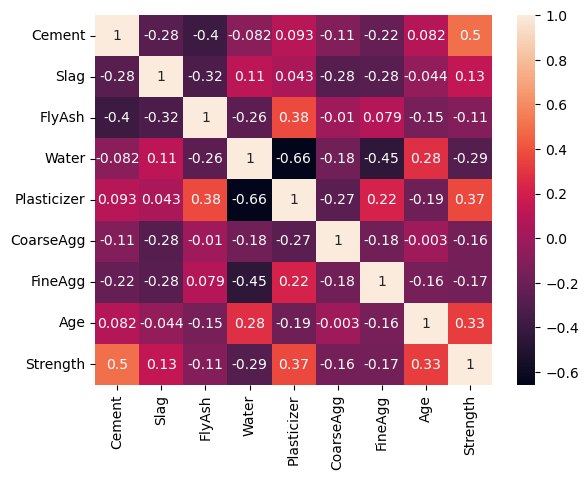

In [12]:
sns.heatmap(df.corr(),annot=True)

## Modelling

#### Regression

In [13]:
x=df.drop("Strength",axis=1)

In [14]:
y=df["Strength"]

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error


def algo_test(x,y):
        #Bütün modelleri tanımlıyorum
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
        ab=AdaBoostRegressor()
        rf=RandomForestRegressor()


        algos=[L,R,Lass,E,ETR,GBR,kn,dt,xgb,ab,rf]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','Extra Tree','Gradient Boosting',
                    'KNeighbors','Decision Tree','XGBRegressor', 'AdaBoost', 'Random Forest']

        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.2,random_state=42)

        r_squared= []
        rmse= []
        mae= []

        #Hata ve doğruluk oranlarını bir tablo haline getirmek için bir dataframe oluşturuyorum
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)


        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))



        #result adlı tabloya doğruluk ve hata oranlarımı yerleştiriyorum
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae

       #oluşturduğum result tablosunu doğruluk oranına (r2_score) göre sıralayıp dönüyor
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [16]:
algo_test(x,y)

,R_Squared,RMSE,MAE
XGBRegressor,0.923075,4.452198,2.906828
Random Forest,0.885605,5.429309,3.795818
Gradient Boosting,0.880874,5.540436,4.097392
Decision Tree,0.790274,7.351356,4.650440
Extra Tree,0.770995,7.681821,4.974715
AdaBoost,0.761092,7.846154,6.555626
KNeighbors,0.736766,8.235928,6.451223
ElasticNet,0.627632,9.795514,7.743307
Lasso,0.627577,9.796240,7.743496
Ridge,0.627542,9.796706,7.745389


In [15]:
lr=LinearRegression()

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20 ,random_state=42)

In [17]:
lr.fit(x_train,y_train)

LinearRegression()

In [18]:
thmn=lr.predict(x_test)

In [19]:
r2_score(thmn,y_test)

0.42303938808034913

In [20]:
feature_importance = pd.DataFrame({"Feature":x_train.columns,"Coefs":lr.coef_})

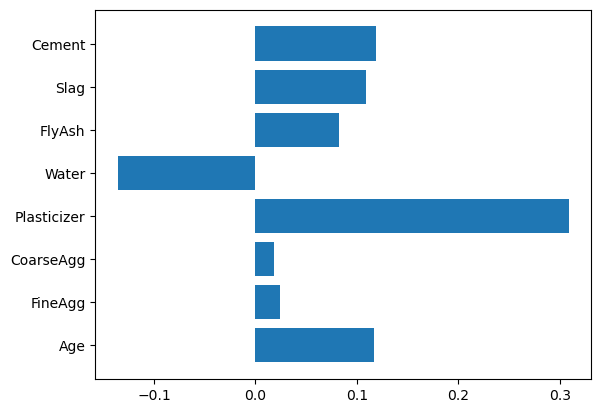

In [21]:
plt.figure()
plt.barh(feature_importance["Feature"],feature_importance["Coefs"])
plt.gca().invert_yaxis()

In [24]:
xg=XGBRegressor()

In [25]:
xg.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [26]:
thmin=xg.predict(x_test)

In [27]:
r2_score(thmin,y_test)

0.9151598032322467

In [28]:
residuals=y_test-thmin

<Axes: xlabel='Strength', ylabel='Count'>

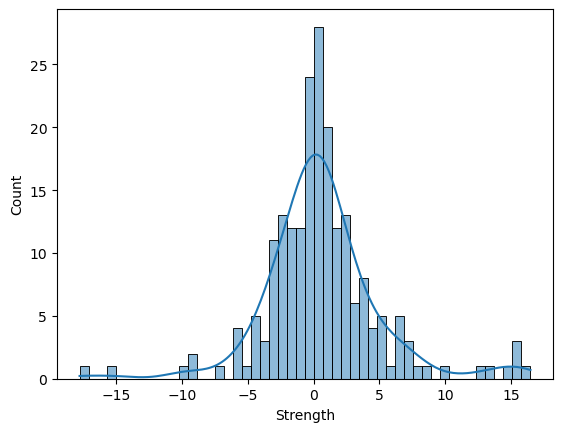

In [29]:
sns.histplot(residuals,kde=True,bins=50)

<Axes: xlabel='Strength', ylabel='Density'>

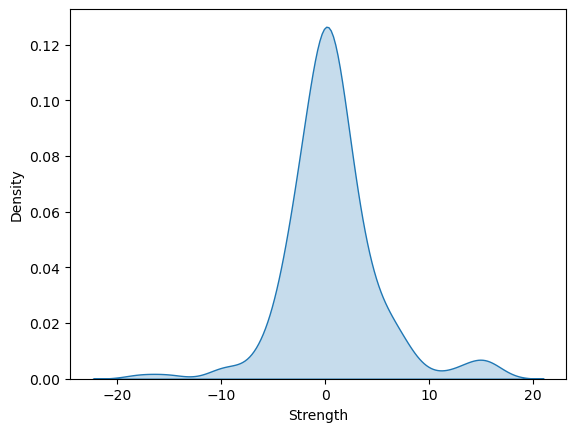

In [30]:
sns.kdeplot(residuals, fill=True)

##### Deep Learning

In [31]:
x=scale(x)

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20 ,random_state=42)

In [33]:
model=Sequential()
model.add(Dense(120,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(30,activation="relu"))
model.add(Dense(20,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam")


In [34]:
history=model.fit(x_train,y_train ,validation_data=(x_test,y_test), batch_size=128, epochs=300)

Epoch 1/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 1555.4131 - val_loss: 1501.5558
Epoch 2/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1549.6901 - val_loss: 1459.7761
Epoch 3/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1497.3889 - val_loss: 1381.9679
Epoch 4/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1386.7024 - val_loss: 1239.7582
Epoch 5/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1234.8510 - val_loss: 999.9753
Epoch 6/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 987.8331 - val_loss: 653.9351
Epoch 7/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 603.7768 - val_loss: 312.3132
Epoch 8/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 319.9562 - val_loss: 257.8978
Epoch 9/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 306.1935 - val_loss: 240.6280
Epoch 10/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 247.3501 - val_loss: 208.6131
Epoch 11/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 226.1663 - val_loss: 213.3105
Epoch 12/300
7/7 ━━━━━━━━━━━━━━

In [35]:
tahmin=model.predict(x_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [36]:
mean_squared_error(tahmin,y_test)**.5

5.616413798794525

In [37]:
r2_score(tahmin,y_test)

0.8729739783551265

In [38]:
loss_f=pd.DataFrame(history.history)

<Axes: >

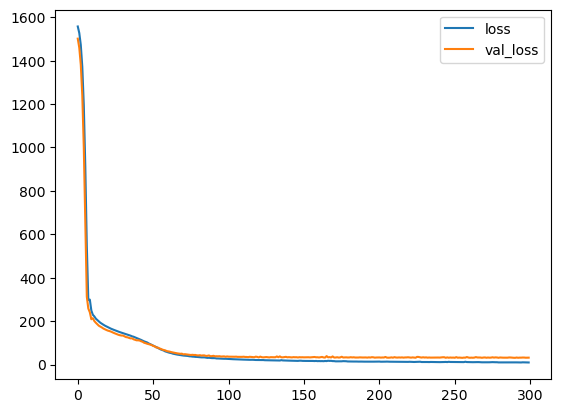

In [39]:
loss_f.plot()

#### Classification

In [40]:
def green_classifier(s):
    """
    Use numeric data to create a Green categorical feature.
    """

    if (s.Slag + s.FlyAsh < 150.0) and (s.Plasticizer < 10.0):
        return "n/a"
    else:
        return "green"


In [41]:
def strength_classifer(x):

    if x < 17.0:
        return "non-structural"
    elif x < 28.0:
        return "residential"
    elif x < 70.0:
        return "commercial"
    else:
        return "high-strength"


df["Green"] = df.apply(green_classifier, axis=1)
df["ConcreteClass"] = df.Strength.apply(strength_classifer)

# convert Plasticizer to text (the numeric values are embedded in Green)
df.Plasticizer = df.Plasticizer.apply(lambda x: "yes" if x > 0 else "no")

# remove Strength feature as replaced by categorical target ConcreteClass
df.drop("Strength", axis=1, inplace=True)

In [42]:
df

,Cement,Slag,FlyAsh,Water,Plasticizer,CoarseAgg,FineAgg,Age,Green,ConcreteClass
0,540.0,0.0,0.0,162.0,yes,1040.0,676.0,28,n/a,high-strength
1,540.0,0.0,0.0,162.0,yes,1055.0,676.0,28,n/a,commercial
2,332.5,142.5,0.0,228.0,no,932.0,594.0,270,n/a,commercial
3,332.5,142.5,0.0,228.0,no,932.0,594.0,365,n/a,commercial
4,198.6,132.4,0.0,192.0,no,978.4,825.5,360,n/a,commercial
...,...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,yes,870.1,768.3,28,green,commercial
1026,322.2,0.0,115.6,196.0,yes,817.9,813.4,28,green,commercial
1027,148.5,139.4,108.6,192.7,yes,892.4,780.0,28,green,residential
1028,159.1,186.7,0.0,175.6,yes,989.6,788.9,28,green,commercial


In [43]:
df["ConcreteClass"].value_counts()

ConcreteClass
commercial        633
residential       213
non-structural    148
high-strength      36
Name: count, dtype: int64

In [44]:
df["Green"].value_counts()

Green
green    560
n/a      470
Name: count, dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Cement         1030 non-null   float64
 1   Slag           1030 non-null   float64
 2   FlyAsh         1030 non-null   float64
 3   Water          1030 non-null   float64
 4   Plasticizer    1030 non-null   object 
 5   CoarseAgg      1030 non-null   float64
 6   FineAgg        1030 non-null   float64
 7   Age            1030 non-null   int64  
 8   Green          1030 non-null   object 
 9   ConcreteClass  1030 non-null   object 
dtypes: float64(6), int64(1), object(3)
memory usage: 80.6+ KB


In [46]:
d1={"yes":1,"no":0}

In [47]:
df["Plasticizer"]=df["Plasticizer"].map(d1)

In [48]:
d2={"green":1,"n/a":0}

In [49]:
df["Green"]=df["Green"].map(d2)

In [50]:
d3={"commercial":0,"residential":1,"non-structural":2,"high-strength":3}

In [51]:
df["ConcreteClass"]=df["ConcreteClass"].map(d3)

In [52]:
df

,Cement,Slag,FlyAsh,Water,Plasticizer,CoarseAgg,FineAgg,Age,Green,ConcreteClass
0,540.0,0.0,0.0,162.0,1,1040.0,676.0,28,0,3
1,540.0,0.0,0.0,162.0,1,1055.0,676.0,28,0,0
2,332.5,142.5,0.0,228.0,0,932.0,594.0,270,0,0
3,332.5,142.5,0.0,228.0,0,932.0,594.0,365,0,0
4,198.6,132.4,0.0,192.0,0,978.4,825.5,360,0,0
...,...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,1,870.1,768.3,28,1,0
1026,322.2,0.0,115.6,196.0,1,817.9,813.4,28,1,0
1027,148.5,139.4,108.6,192.7,1,892.4,780.0,28,1,1
1028,159.1,186.7,0.0,175.6,1,989.6,788.9,28,1,0


In [53]:
x=df.drop("ConcreteClass",axis=1)

In [54]:
y=df["ConcreteClass"]

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20 ,random_state=42)

In [56]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def algo_test_classification(X, y):
    # Bütün sınıflandırma modellerini tanımlıyorum
    lr = LogisticRegression(max_iter=1000)
    svc = SVC()
    knn = KNeighborsClassifier()
    dt = DecisionTreeClassifier()
    rf = RandomForestClassifier()
    gb = GradientBoostingClassifier()
    xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
    mlp = MLPClassifier(max_iter=1000)

    algos = [lr, svc, knn, dt, rf, gb, xgb, mlp]
    algo_names = ['Logistic Regression', 'SVC', 'KNN', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'MLP']

    # Eğitim ve test setlerini ayır
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    accuracy = []
    precision = []
    recall = []
    f1 = []

    # Sonuç tablosunu oluşturuyorum
    result = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1'], index=algo_names)

    for algo in algos:
        algo.fit(X_train, y_train)
        y_pred = algo.predict(X_test)

        accuracy.append(accuracy_score(y_test, y_pred))
        precision.append(precision_score(y_test, y_pred, average='weighted'))  # average parametresi eklendi
        recall.append(recall_score(y_test, y_pred, average='weighted'))          # average parametresi eklendi
        f1.append(f1_score(y_test, y_pred, average='weighted'))                  # average parametresi eklendi

    # Sonuçları result tablosuna ekliyorum
    result['Accuracy'] = accuracy
    result['Precision'] = precision
    result['Recall'] = recall
    result['F1'] = f1

    # Sonuçları doğruluk oranına göre sıralayıp döndürüyorum
    return result.sort_values('Accuracy', ascending=False)

# Örnek kullanım
# X, y verilerinizi tanımladıktan sonra fonksiyonu çağırabilirsiniz.
# result = algo_test_classification(X, y)
# print(result)

In [57]:
algo_test_classification(x,y)

,Accuracy,Precision,Recall,F1
Gradient Boosting,0.883495,0.887510,0.883495,0.883684
Random Forest,0.878641,0.883340,0.878641,0.875715
XGBoost,0.878641,0.887616,0.878641,0.881569
Decision Tree,0.844660,0.860293,0.844660,0.847188
Logistic Regression,0.800971,0.794455,0.800971,0.796239
MLP,0.742718,0.760248,0.742718,0.726645
KNN,0.737864,0.728585,0.737864,0.720978
SVC,0.645631,0.416839,0.645631,0.506601


In [58]:
rf = RandomForestClassifier()

In [59]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [60]:
tahmn=rf.predict(x_test)

In [61]:
accuracy_score(tahmn,y_test)

0.883495145631068

In [62]:
confusion_matrix(tahmn,y_test)

array([[127,   7,   0,   4],
       [  6,  26,   5,   0],
       [  0,   2,  27,   0],
       [  0,   0,   0,   2]], dtype=int64)

<Axes: >

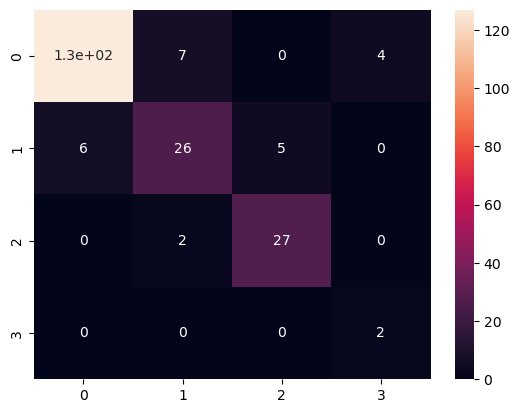

In [63]:
sns.heatmap(confusion_matrix(tahmn,y_test),annot=True)

In [64]:
print(classification_report(tahmn,y_test))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94       138
           1       0.74      0.70      0.72        37
           2       0.84      0.93      0.89        29
           3       0.33      1.00      0.50         2

    accuracy                           0.88       206
   macro avg       0.72      0.89      0.76       206
weighted avg       0.90      0.88      0.89       206



##### Deep Learning

In [65]:
x=scale(x)

In [66]:
model=Sequential()
model.add(Dense(120,activation="relu"))  # Modele layer ekliyor # Dense bütün nöronlar bütün nöronlara bağlansın demek
model.add(Dense(80,activation="relu")) # 120 nöron var
model.add(Dense(64,activation="relu"))
model.add(Dense(30,activation="relu"))
model.add(Dense(20,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(4,activation="softmax")) # 4 çıkış oldugu için sigmoid yerine softmax kullandık
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam",metrics=["accuracy"]) # Loss: hata MSE gibi # Optimizer=adam : Gradient Descend -> sonuca
                                                                                                                         #  yaklaştıkça adımları küçültüyor

In [67]:
hist=model.fit(x,y,epochs=250,batch_size=23, validation_split=.20, verbose=1) # epochs: Nöronlar areasında kaç kere dolaşacağını göstryr
                                                                         # batc_size: Veriler  büyük olduğu için veriyi eşit parçalara bölüyor
                                                                         # validation_split=.20: Verilerin 80% i eğitim 20% test için ayırıyor
                                                                         # verbose : Aşağıda yazılar çıkıyor, bize hangi basamakta olduğumuzu söylüyor

Epoch 1/250
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4661 - loss: 1.2632 - val_accuracy: 0.6553 - val_loss: 0.9793
Epoch 2/250
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6003 - loss: 0.9606 - val_accuracy: 0.6699 - val_loss: 0.9340
Epoch 3/250
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6849 - loss: 0.8235 - val_accuracy: 0.6602 - val_loss: 0.9845
Epoch 4/250
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6995 - loss: 0.7247 - val_accuracy: 0.6214 - val_loss: 0.9180
Epoch 5/250
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7065 - loss: 0.6479 - val_accuracy: 0.6311 - val_loss: 0.8736
Epoch 6/250
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8010 - loss: 0.5754 - val_accuracy: 0.6311 - val_loss: 1.0421
Epoch 7/250
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8282 - loss: 0.4896 - val_accuracy: 0.6214 - val_loss: 1.1575
Epoch 8/250
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8166 - loss: 0.4634 - val_accuracy: 0.6165 - v

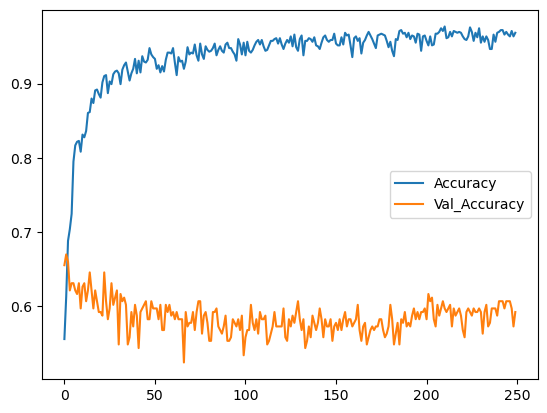

In [68]:
plt.plot(hist.history["accuracy"],label="Accuracy")
plt.plot(hist.history["val_accuracy"],label="Val_Accuracy")
plt.legend()

Sonuc olarak hem regression hem classification projelerimizi hem normal hem de deep learning şeklinde çözdük. Regression da XGBRegressor da 92%, deep learning de ise 87% r2 score elde ettik. Classificaton projemizde ise Gradient Boosting 88%, deep learning de 96% accuracy score aldık.